# NLP Hotel review analysis
Benedikt Middelstaedt - 10 June 2024 - BrainStation Data Science & AI Bootcamp 
______________________________________________________________________________

## Table of content

1. Basic Setup
2. Introduction
3. Conclusion
4. Tasks

    4.1 Exploratory Data Analysis

    4.2 Preprocessing
    
    4.3 Logistic regression model

    4.4 PCA with a decision tree classifier

    4.5 In-depth evaluation

## 1. Basic setup

The Conda Environment plotly_bokeh with Python version 3.8.19 is used to process the project. Due to the size of the sklearn library, the corresponding module is loaded when required and not at the beginning.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import scipy as sp



Allgemeine Einstellungen

In [39]:
pd.set_option('display.max_columns', None)

Folgende Funktionen werden im weiteren Verlauf benutzt: 

In [40]:
import nltk
import string

# Download the stopwords data
nltk.download('stopwords')

# Import the stopwords from NLTK corpus
from nltk.corpus import stopwords 

# Get the list of English stopwords
ENGLISH_STOP_WORDS = stopwords.words('english')



from nltk.stem import PorterStemmer
stemmer = nltk.stem.PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BMidd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
### Functions


def custom_tokenizer(sentence):
    """
    Tokenizes a given sentence by performing the following steps:
    1. Remove punctuation and convert all characters to lowercase.
    2. Split the sentence into individual words.
    3. Remove stopwords and any empty tokens.
    4. Stem the remaining words using PorterStemmer.
    
    Args:
    sentence (str): The input sentence to be tokenized.
    
    Returns:
    list: A list of stemmed words after removing stopwords and punctuation.
    """
    
    # Remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark, '').lower()

    # Split the sentence into individual words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # Remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word != ''):
            # Stem the word
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words


In [42]:
def rename_tokens(matrix, mapping,token_list):
    indices = [list(mapping.keys()).index(token) for token in token_list]
    return matrix[:, indices]

In [168]:
def false_positive_rate(y_true, y_pred):

    false_positives = (y_true == 0) & (y_pred == 1) # find all values where y is negative
                                                    # but we predicted positive
    false_positive_number = false_positives.sum()

    true_negatives = (y_true == 0) & (y_pred == 0)  # find all values where y is negative
                                                    # and we predicted negative
    true_negative_number = true_negatives.sum()

    # Finally, find the ratio of (FP) to (TN + FP)
    FPR = false_positive_number/(true_negative_number + false_positive_number)

    return FPR

Übersicht über die Benutzten Dataframes, wichtige Variablen und Zwischenergebnisse:

In [43]:
### dataframes, variables, and saved solutions

## 2. Introduction

Datensatz vom 3.8.2017 - bis zum 4.8.2015 

## 3. Conclusion

## 4. Hotel review analysis

The following is a step-by-step procedure for analysing the data set. 

### 4.1 Exploratory Data Analysis


#### Get an understanding of the data 

This was followed by an initial overview of the data set in its raw form: 

Remark: 
In the first load, the column ‘Unnamed: 0’ appeared, this had the same information content as the index that Panda's read_csv automatically assigns.

It is possible to delete this. This can be used subsequently instead of the automatic index or the argument index_col = 0 can be included in the import of the file in order to use it immediately as an index.
As the removal is a one-off operation that leads to errors if repeated, index_col = 0 has been added at the top.

Source: 

https://stackoverflow.com/questions/36519086/how-to-get-rid-of-unnamed-0-column-in-a-pandas-dataframe-read-in-from-csv-fil

In [44]:
data_raw = pd.read_csv('../data/Hotel_Reviews.csv', index_col=0)
data_raw.head(2).T # T to get a better overview over the columns - the values matter less for now.

0  \
Additional_Number_of_Scoring                                                              194   
Average_Score                                                                             7.7   
Negative_Review                              I am so angry that i made this post available...   
Review_Total_Negative_Word_Counts                                                         397   
Total_Number_of_Reviews                                                                  1403   
Positive_Review                              Only the park outside of the hotel was beauti...   
Review_Total_Positive_Word_Counts                                                          11   
Total_Number_of_Reviews_Reviewer_Has_Given                                                  7   
Reviewer_Score                                                                              0   
Days_Since_Review                                                                           0   
Latitude                                                                            52.360576   
Longitude                                                                            4.915968   
Day                                                                                         3   
Month                                                                                       8   
Year                                                                                     2017   
Reviewer_Nationality_Australia                                                              0   
Reviewer_Nationality_Ireland                                                                0   
Reviewer_Nationality_UAE                                                                    0   
Reviewer_Nationality_UK                                                                     0   
Reviewer_Nationality_USA                                                                    0   
Reviewer_Nationality_Other                                                                  1   
Hotel_Address_Amsterdam                                                                     1   
Hotel_Address_Barcelona                                                                     0   
Hotel_Address_London                                                                        0   
Hotel_Address_Milan                                                                         0   
Hotel_Address_Paris                                                                         0   
Hotel_Address_Vienna                                                                        0   
Leisure_Trip                                                                                1   
Nights_Stayed                                                                               6   

                                                                                            1  
Additional_Number_of_Scoring                                                              194  
Average_Score                                                                             7.7  
Negative_Review                                                                   No Negative  
Review_Total_Negative_Word_Counts                                                           0  
Total_Number_of_Reviews                                                                  1403  
Positive_Review                              No real complaints the hotel was great great ...  
Review_Total_Positive_Word_Counts                                                         105  
Total_Number_of_Reviews_Reviewer_Has_Given                                                  7  
Reviewer_Score                                                                              0  
Days_Since_Review                                                                           0  
Latitude                                                                            52.360576  
Longitude                    

Auf den ersten Blick besteht Unklarkeit über die Information in den Spalten. Zumnächst wird sich deshalb eine Übersicht zum genauen Verständnis des Daten verschafft.  

In [45]:
data_raw.sample(3)

Additional_Number_of_Scoring  Average_Score Negative_Review  \
279219                           541            7.9     No Negative   
143856                            84            8.7     No Negative   
474108                           224            8.6            Nil    

        Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
279219                                  0                     6792   
143856                                  0                      564   
474108                                  3                     2351   

                                          Positive_Review  \
279219   Nice hotel clean with a nice swimming pool on...   
143856   Staffs help us a lot It was wonderful stay fo...   
474108       The room is large and the breakfast is good    

        Review_Total_Positive_Word_Counts  \
279219                                 12   
143856                                 16   
474108                                 11   

        Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
279219                                           7               1   
143856                                           1               1   
474108                                          40               1   

        Days_Since_Review   Latitude  Longitude  Day  Month  Year  \
279219                329  41.411006   2.186601    8      9  2016   
143856                462  48.871508   2.312226   28      4  2016   
474108                346  45.484137   9.200162   22      8  2016   

        Reviewer_Nationality_Australia  Reviewer_Nationality_Ireland  \
279219                               0                             0   
143856                               0                             0   
474108                               0                             0   

        Reviewer_Nationality_UAE  Reviewer_Nationality_UK  \
279219                         0                        0   
143856                         0                        0   
474108                         0                        0   

        Reviewer_Nationality_USA  Reviewer_Nationality_Other  \
279219                         0                           1   
143856                         0                           1   
474108                         0                           1   

        Hotel_Address_Amsterdam  Hotel_Address_Barcelona  \
279219                        0                        1   
143856                        0                        0   
474108                        0                        0   

        Hotel_Address_London  Hotel_Address_Milan  Hotel_Address_Paris  \
279219                     0                    0                    0   
143856                     0                    0                    1   
474108                     0                    1                    0   

        Hotel_Address_Vienna  Leisure_Trip  Nights_Stayed  
279219                     0             1              1  
143856                     0             0              1  
474108                     0             1              2

In [46]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515738 entries, 0 to 515737
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515738 non-null  int64  
 1   Average_Score                               515738 non-null  float64
 2   Negative_Review                             515738 non-null  object 
 3   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 4   Total_Number_of_Reviews                     515738 non-null  int64  
 5   Positive_Review                             515738 non-null  object 
 6   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 8   Reviewer_Score                              515738 non-null  int64  
 9   Days_Since_Review                           515738 non-null  int64  
 10  L

We have 515738 values in each column and there seems to be no NaN values or errors in the data type, the data type of the columns is the expected one.
In the dataset we have the following column categories:

1. review columns
2. hotel columns

and our target column (Pos 8) ‘Reviewer_Score’



For personal taste of the author, the columns in the dataframe are ordered from column 1 to column 30: 

Target:


 8   Reviewer_Score                             

Evaluation columns:              

 2   Negative_Review               
 3   Review_Total_Negative_Word_Counts               
 5   Positive_Review                
 6   Review_Total_Positive_Word_Counts   
 27  Leisure_Trip                                                              
 28  Nights_Stayed               
 9   Days_Since_Review               
 12  Day                                  
 13  Month      
 14  Year               
 0   Additional_Number_of_Scoring                  
 15  Reviewer_Nationality_Australia                             
 16  Reviewer_Nationality_Ireland                 
 17  Reviewer_Nationality_UAE                     
 18  Reviewer_Nationality_UK                       
 19  Reviewer_Nationality_USA                      
 20  Reviewer_Nationality_Other      
 7   Total_Number_of_Reviews_Reviewer_Has_Given                           

Hotel columns:

 1   Average_Score               
 4   Total_Number_of_Reviews               
 21  Hotel_Address_Amsterdam                                     
 22  Hotel_Address_Barcelona                  
 23  Hotel_Address_London                        
 24  Hotel_Address_Milan                           
 25  Hotel_Address_Paris                          
 26  Hotel_Address_Vienna                        
 10  Latitude                                    
 11  Longitude                                   



 


  

  





#### Unclear columns

The logic behind these columns is unclear at the beginning of the EDA, so they will be considered in detail.


 0   Additional_Number_of_Scoring                               
 2   Negative_Review              
 3   Review_Total_Negative_Word_Counts               
 5   Positive_Review                
 6   Review_Total_Positive_Word_Counts               
      

In [47]:
c = list(data_raw.columns)

In [48]:
c = list(data_raw.columns)
data_raw.loc[20003:20008, [c[8],c[0], c[2], c[3],c[5],c[6]]]

Reviewer_Score  Additional_Number_of_Scoring  \
20003               0                           788   
20004               1                           788   
20005               1                           788   
20006               1                           788   
20007               0                           788   
20008               0                           788   

                                         Negative_Review  \
20003   Room was tighter than square footage would imply   
20004                    Jacuzzi in spa was out of order   
20005       More information available about restaurents   
20006                                 We had to go home    
20007   Already complained to the hotel and booking c...   
20008            poor room service and attitude of staff   

       Review_Total_Negative_Word_Counts  \
20003                                  9   
20004                                  8   
20005                                  6   
20006                                  7   
20007                                 18   
20008                                  8   

                                         Positive_Review  \
20003                                           Location   
20004                                        No Positive   
20005   Liked room facilities in bathroom enjoyed swi...   
20006   Very helpful staff nothing was too much troub...   
20007                                        No Positive   
20008                  location and facilities excellent   

       Review_Total_Positive_Word_Counts  
20003                                  2  
20004                                  0  
20005                                 10  
20006                                 19  
20007                                  0  
20008                                  5

Uncertainties:

- what is the meaning of column 0 Additional_Number_of_Scoring?                               
- why is the word count in column 2 Negative_Review not equal to 3 Review_Total_Negative_Word_Counts?     
- why is the word count in column 5 Positive_Review not equal to 6 Review_Total_Positive_Word_Counts?
     


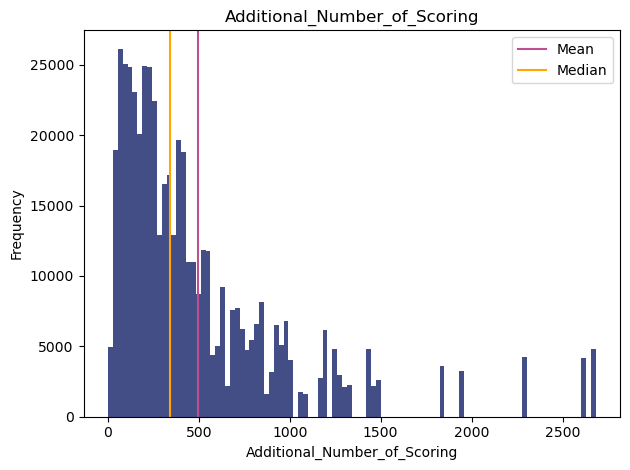

In [49]:
plt.figure()

plt.hist(data_raw['Additional_Number_of_Scoring'], bins= 100,color='#444e86')
plt.title('Additional_Number_of_Scoring')
plt.xlabel('Additional_Number_of_Scoring')
plt.ylabel('Frequency')
plt.axvline(data_raw['Additional_Number_of_Scoring'].mean(), c = '#bc5090', label = 'Mean')
plt.axvline(data_raw['Additional_Number_of_Scoring'].median(), c ='#ffa600', label = "Median")
plt.legend()

plt.tight_layout()
plt.show()

We simply regard the column as additional scoring information and stop the analysis at this point. 

In [50]:
data_raw.head(4)

Additional_Number_of_Scoring  Average_Score  \
0                           194            7.7   
1                           194            7.7   
2                           194            7.7   
3                           194            7.7   

                                     Negative_Review  \
0   I am so angry that i made this post available...   
1                                        No Negative   
2   Rooms are nice but for elderly a bit difficul...   
3   My room was dirty and I was afraid to walk ba...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7               0   
1                                           7               0   
2                                           9               0   
3                                           1               0   

   Days_Since_Review   Latitude  Longitude  Day  Month  Year  \
0                  0  52.360576   4.915968    3      8  2017   
1                  0  52.360576   4.915968    3      8  2017   
2                  3  52.360576   4.915968   31      7  2017   
3                  3  52.360576   4.915968   31      7  2017   

   Reviewer_Nationality_Australia  Reviewer_Nationality_Ireland  \
0                               0                             0   
1                               0                             1   
2                               1                             0   
3                               0                             0   

   Reviewer_Nationality_UAE  Reviewer_Nationality_UK  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        1   

   Reviewer_Nationality_USA  Reviewer_Nationality_Other  \
0                         0                           1   
1                         0                           0   
2                         0                           0   
3                         0                           0   

   Hotel_Address_Amsterdam  Hotel_Address_Barcelona  Hotel_Address_London  \
0                        1                        0                     0   
1                        1                        0                     0   
2                        1                        0                     0   
3                        1                        0                     0   

   Hotel_Address_Milan  Hotel_Address_Paris  Hotel_Address_Vienna  \
0                    0                    0                     0   
1                    0                    0                     0   
2                    0                    0                     0   
3                    0                    0                     0   

   Leisure_Trip  Nights_Stayed  
0             1              6  
1             1              4  
2             1              3  
3             1              3

In [51]:
#Testing the negative reviews

import string
random_test = list(np.random.choice(range(1, 515737), size=35, replace=False))

for i in random_test:
    s1 = data_raw.loc[i,['Negative_Review']].item()
    if len(s1.split(' ')) == data_raw.loc[i,['Review_Total_Negative_Word_Counts']].item():
        continue # skip columns with a review or no difference between count and sentence 
    else:
        a = len(s1.split(' '))-data_raw.loc[i,['Review_Total_Negative_Word_Counts']].item()
        value = data_raw.loc[i,['Negative_Review']].item()
        print(f'subtraction: {a} and value: {value}')



subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative


The column ‘Review_Total_Negative_Word_Counts’ counts the number of values: The expression No Negative means that no negative comment was entered in the questionnaire. 

In [52]:
# sanity check fpr Positive_review

random_test = list(np.random.choice(range(1, 515737), size=35, replace=False))

for i in random_test:
    s1 = data_raw.loc[i,['Positive_Review']].item()
    if len(s1.split(' ')) == data_raw.loc[i,['Review_Total_Positive_Word_Counts']].item():
        continue
    else:
        a = len(s1.split(' '))-data_raw.loc[i,['Review_Total_Positive_Word_Counts']].item()
        value = data_raw.loc[i,['Positive_Review']].item()
        print(f'subtraction: {a} and value: {value}')

subtraction: 2 and value: No Positive
subtraction: 2 and value: No Positive
subtraction: 2 and value: No Positive
subtraction: 2 and value: No Positive
subtraction: 2 and value: No Positive
subtraction: 2 and value: No Positive
subtraction: 2 and value: No Positive


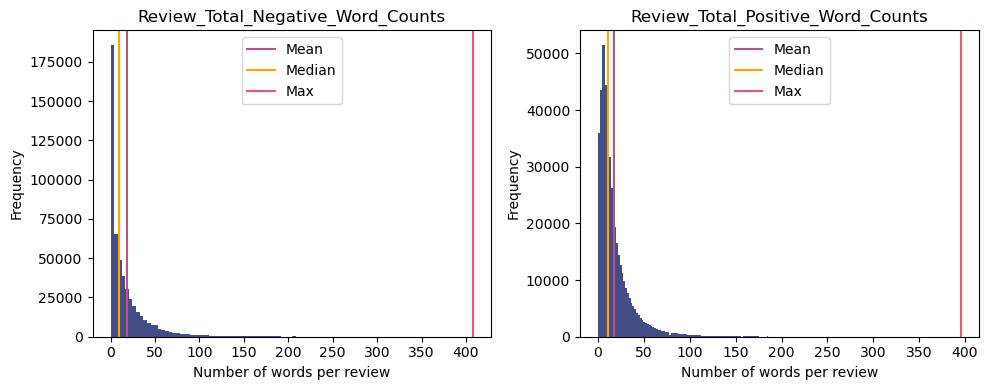

number of no negative/ empty text fields reviews: 127890, number of no positive/ empty text fields reviews: 35946


In [53]:

a = (data_raw['Review_Total_Negative_Word_Counts']== 0).sum()
b = (data_raw['Review_Total_Positive_Word_Counts']== 0).sum()

plt.subplots(1,2, figsize = (10,4))

plt.subplot(1,2,1)
plt.hist(data_raw['Review_Total_Negative_Word_Counts'], bins= 100,color='#444e86')
plt.title('Review_Total_Negative_Word_Counts')
plt.xlabel('Number of words per review')
plt.axvline(data_raw['Review_Total_Negative_Word_Counts'].mean(), c = '#bc5090', label = 'Mean')
plt.axvline(data_raw['Review_Total_Negative_Word_Counts'].median(), c ='#ffa600', label = "Median")
plt.axvline(data_raw['Review_Total_Negative_Word_Counts'].max(),c ='#ef5675', label = 'Max')
plt.ylabel('Frequency')
plt. legend(loc='upper center')

plt.subplot(1,2,2)
plt.hist(data_raw['Review_Total_Positive_Word_Counts'], bins= 200,color='#444e86')
plt.title('Review_Total_Positive_Word_Counts')
plt.xlabel('Number of words per review')
plt.axvline(data_raw['Review_Total_Positive_Word_Counts'].mean(), c = '#bc5090', label = 'Mean')
plt.axvline(data_raw['Review_Total_Positive_Word_Counts'].median(), c ='#ffa600', label = "Median")
plt.axvline(data_raw['Review_Total_Positive_Word_Counts'].max(),c ='#ef5675', label = 'Max')
plt.ylabel('Frequency')

plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

print(f'number of no negative/ empty text fields reviews: {a}, number of no positive/ empty text fields reviews: {b}')


We can conclude from this that the willingness to make a written statement is higher when positive feedback is given. In the case of negative feedback, more precise details are often not given. 

The connection between text and Review_Total_Negative/Positve_Word_Counts and Positive/Negative_Review is clear, the confusion was caused by the statement No Negative/No Positive.

#### Creating of the clean dataframe

In [54]:
print(c)

['Additional_Number_of_Scoring', 'Average_Score', 'Negative_Review', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Positive_Review', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Days_Since_Review', 'Latitude', 'Longitude', 'Day', 'Month', 'Year', 'Reviewer_Nationality_Australia', 'Reviewer_Nationality_Ireland', 'Reviewer_Nationality_UAE', 'Reviewer_Nationality_UK', 'Reviewer_Nationality_USA', 'Reviewer_Nationality_Other', 'Hotel_Address_Amsterdam', 'Hotel_Address_Barcelona', 'Hotel_Address_London', 'Hotel_Address_Milan', 'Hotel_Address_Paris', 'Hotel_Address_Vienna', 'Leisure_Trip', 'Nights_Stayed']


In [55]:
data = data_raw[[
    c[8], # target column
    c[2],c[5], # Reviews
    c[3],c[6],c[27],c[28],c[9],c[12],c[13],c[14],c[0],c[15],c[16],c[17],c[18],c[19],c[20],c[7], #Review adddition information columns
    c[1],c[4],c[21],c[22],c[23],c[24],c[25],c[26],c[10],c[11] #Hotel information columns 
]]

In [56]:
data.head(3)

Reviewer_Score                                    Negative_Review  \
0               0   I am so angry that i made this post available...   
1               0                                        No Negative   
2               0   Rooms are nice but for elderly a bit difficul...   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   

   Review_Total_Negative_Word_Counts  Review_Total_Positive_Word_Counts  \
0                                397                                 11   
1                                  0                                105   
2                                 42                                 21   

   Leisure_Trip  Nights_Stayed  Days_Since_Review  Day  Month  Year  \
0             1              6                  0    3      8  2017   
1             1              4                  0    3      8  2017   
2             1              3                  3   31      7  2017   

   Additional_Number_of_Scoring  Reviewer_Nationality_Australia  \
0                           194                               0   
1                           194                               0   
2                           194                               1   

   Reviewer_Nationality_Ireland  Reviewer_Nationality_UAE  \
0                             0                         0   
1                             1                         0   
2                             0                         0   

   Reviewer_Nationality_UK  Reviewer_Nationality_USA  \
0                        0                         0   
1                        0                         0   
2                        0                         0   

   Reviewer_Nationality_Other  Total_Number_of_Reviews_Reviewer_Has_Given  \
0                           1                                           7   
1                           0                                           7   
2                           0                                           9   

   Average_Score  Total_Number_of_Reviews  Hotel_Address_Amsterdam  \
0            7.7                     1403                        1   
1            7.7                     1403                        1   
2            7.7                     1403                        1   

   Hotel_Address_Barcelona  Hotel_Address_London  Hotel_Address_Milan  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        0                     0                    0   

   Hotel_Address_Paris  Hotel_Address_Vienna   Latitude  Longitude  
0                    0                     0  52.360576   4.915968  
1                    0                     0  52.360576   4.915968  
2                    0                     0  52.360576   4.915968

#### Exploration 

Die Tage, Monate und Jahre zu einer Spalte zusammenfassen und die einzelnen Spalten (Tag, Monat, Jahr) entfernen.

In [57]:
pd.to_datetime(data[['Year', 'Month', 'Day']]).min()

Timestamp('2015-08-04 00:00:00')

In [58]:
data.insert(8, 'Date', pd.to_datetime(data[['Year', 'Month', 'Day']]))

In [59]:
data = data.drop(columns=['Day', 'Month', 'Year'] ,axis=1)

In [60]:
data.duplicated().sum()

539

In [61]:
data[data.duplicated(keep=False)].head(4)

Reviewer_Score Negative_Review  \
22083               1         Nothing   
22084               1         Nothing   
23703               1            none   
23704               1            none   

                                         Positive_Review  \
22083                                       Good Service   
22084                                       Good Service   
23703   good location and super nice staff room is bi...   
23704   good location and super nice staff room is bi...   

       Review_Total_Negative_Word_Counts  Review_Total_Positive_Word_Counts  \
22083                                  2                                  3   
22084                                  2                                  3   
23703                                  2                                 13   
23704                                  2                                 13   

       Leisure_Trip  Nights_Stayed  Days_Since_Review       Date  \
22083             0              4                  0 2017-08-03   
22084             0              4                  0 2017-08-03   
23703             0              1                159 2017-02-25   
23704             0              1                159 2017-02-25   

       Additional_Number_of_Scoring  Reviewer_Nationality_Australia  \
22083                            83                               0   
22084                            83                               0   
23703                           728                               0   
23704                           728                               0   

       Reviewer_Nationality_Ireland  Reviewer_Nationality_UAE  \
22083                             0                         0   
22084                             0                         0   
23703                             0                         0   
23704                             0                         0   

       Reviewer_Nationality_UK  Reviewer_Nationality_USA  \
22083                        0                         0   
22084                        0                         0   
23703                        0                         0   
23704                        0                         0   

       Reviewer_Nationality_Other  Total_Number_of_Reviews_Reviewer_Has_Given  \
22083                           1                                           5   
22084                           1                                           5   
23703                           1                                          39   
23704                           1                                          39   

       Average_Score  Total_Number_of_Reviews  Hotel_Address_Amsterdam  \
22083            8.3                      549                        0   
22084            8.3                      549                        0   
23703            8.9                     3168                        0   
23704            8.9                     3168                        0   

       Hotel_Address_Barcelona  Hotel_Address_London  Hotel_Address_Milan  \
22083                        0                     0                    0   
22084                        0                     0                    0   
23703                        0                     1                    0   
23704                        0                     1                    0   

       Hotel_Address_Paris  Hotel_Address_Vienna   Latitude  Longitude  
22083                    1                     0  48.849143   2.339712  
22084                    1                     0  48.849143   2.339712  
23703                    0                     0  51.528677  -0.128349  
23704                    0                     0  51.528677  -0.128349

Um die Duplikate zu untersuchen ist es wichtig, die Spalten des Hotels auszuschließen. Diese sind kein Kriterium um ein echtes Duplikat von einem zufälligen zu unterscheiden. Daher wird ein Dataframe duplicate erstellt. 

In [62]:
duplicate = data[data.duplicated(keep = False)].loc[:, 'Negative_Review':'Total_Number_of_Reviews_Reviewer_Has_Given']

durch die loc-Funktion bleibt die Indexierung erhalten. Wir prüfen nun, wie viele 'echte Duplicate' erhalten bleiben, wenn die Hotelkriterien nicht berücksichtigt werden.

In [63]:
duplicate.duplicated().sum()

539

539 = 539, dies bedeutet, dass die Hotelangaben kein Grund für das Duplikat waren. Nun schauen wir uns die Antworten genauer an.

In [64]:
duplicate.head(10)

Negative_Review  \
22083                                            Nothing   
22084                                            Nothing   
23703                                               none   
23704                                               none   
61875                                        No Negative   
61876                                        No Negative   
68936   Location is very old not invested in past yea...   
68937   This hotel I don t think so is 4 star B B hav...   
68938   The staff were not helpful at all It took us ...   
68939   We booked hotel for 3 nights and there was no...   

                                         Positive_Review  \
22083                                       Good Service   
22084                                       Good Service   
23703   good location and super nice staff room is bi...   
23704   good location and super nice staff room is bi...   
61875   The attention received by Sebastian and his t...   
61876   The attention received by Sebastian and his t...   
68936   Location is central accessible by train parki...   
68937                                            Nothing   
68938                                  Near bus terminal   
68939                                        Good place    

       Review_Total_Negative_Word_Counts  Review_Total_Positive_Word_Counts  \
22083                                  2                                  3   
22084                                  2                                  3   
23703                                  2                                 13   
23704                                  2                                 13   
61875                                  0                                 12   
61876                                  0                                 12   
68936                                 41                                 12   
68937                                 93                                  2   
68938                                 69                                  4   
68939                                 39                                  4   

       Leisure_Trip  Nights_Stayed  Days_Since_Review       Date  \
22083             0              4                  0 2017-08-03   
22084             0              4                  0 2017-08-03   
23703             0              1                159 2017-02-25   
23704             0              1                159 2017-02-25   
61875             1              2                  7 2017-07-27   
61876             1              2                  7 2017-07-27   
68936             0              1                 41 2017-06-23   
68937             0              1                 98 2017-04-27   
68938             1              4                152 2017-03-04   
68939             0              3                287 2016-10-20   

       Additional_Number_of_Scoring  Reviewer_Nationality_Australia  \
22083                            83                               0   
22084                            83                               0   
23703                           728                               0   
23704                           728                               0   
61875                           300                               0   
61876                           300                               0   
68936                            11                               0   
68937                            11                               0   
68938                            11                               0   
68939                            11                               0   

       Reviewer_Nationality_Ireland  Reviewer_Nationality_UAE  \
22083                             0                         0   
22084                             0                         0   
23703                             0                         0   
23704                             0                       

Die Duplicate scheinen echte Duplikate zu sein, auch wenn diese nicht immer an aufeinanderfolgenden Indexpostitionen erscheienen. Die Duplikate werden daher in data gelöscht. 

In [65]:
data = data.drop_duplicates(keep='first')

In [66]:
data.duplicated().sum()

0

Check for missing data: 

In [67]:
data.isna().sum()

Reviewer_Score                                0
Negative_Review                               0
Positive_Review                               0
Review_Total_Negative_Word_Counts             0
Review_Total_Positive_Word_Counts             0
Leisure_Trip                                  0
Nights_Stayed                                 0
Days_Since_Review                             0
Date                                          0
Additional_Number_of_Scoring                  0
Reviewer_Nationality_Australia                0
Reviewer_Nationality_Ireland                  0
Reviewer_Nationality_UAE                      0
Reviewer_Nationality_UK                       0
Reviewer_Nationality_USA                      0
Reviewer_Nationality_Other                    0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Average_Score                                 0
Total_Number_of_Reviews                       0
Hotel_Address_Amsterdam                       0
Hotel_Address_Barcelona                 

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515199 entries, 0 to 515737
Data columns (total 27 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Reviewer_Score                              515199 non-null  int64         
 1   Negative_Review                             515199 non-null  object        
 2   Positive_Review                             515199 non-null  object        
 3   Review_Total_Negative_Word_Counts           515199 non-null  int64         
 4   Review_Total_Positive_Word_Counts           515199 non-null  int64         
 5   Leisure_Trip                                515199 non-null  int64         
 6   Nights_Stayed                               515199 non-null  int64         
 7   Days_Since_Review                           515199 non-null  int64         
 8   Date                                        515199 non-null  datetime64[ns]
 9 

To make sure, that the index is equal to the row number we reset the index and safe the dataset 

In [69]:
data = data.reset_index(drop= True)

In [70]:
data.describe()

Reviewer_Score  Review_Total_Negative_Word_Counts  \
count   515199.000000                      515199.000000   
mean         0.570100                          18.540711   
min          0.000000                           0.000000   
25%          0.000000                           2.000000   
50%          1.000000                           9.000000   
75%          1.000000                          23.000000   
max          1.000000                         408.000000   
std          0.495062                          29.693602   

       Review_Total_Positive_Word_Counts   Leisure_Trip  Nights_Stayed  \
count                      515199.000000  515199.000000  515199.000000   
mean                           17.778489       0.810070       2.361750   
min                             0.000000       0.000000       1.000000   
25%                             5.000000       1.000000       1.000000   
50%                            11.000000       1.000000       2.000000   
75%                            22.000000       1.000000       3.000000   
max                           395.000000       1.000000      31.000000   
std                            21.804665       0.392246       1.646734   

       Days_Since_Review                           Date  \
count      515199.000000                         515199   
mean          354.402120  2016-08-13 14:20:56.802129152   
min             0.000000            2015-08-04 00:00:00   
25%           175.000000            2016-02-23 00:00:00   
50%           353.000000            2016-08-15 00:00:00   
75%           527.000000            2017-02-09 00:00:00   
max           730.000000            2017-08-03 00:00:00   
std           208.909135                            NaN   

       Additional_Number_of_Scoring  Reviewer_Nationality_Australia  \
count                 515199.000000                   515199.000000   
mean                     498.417604                        0.042019   
min                        1.000000                        0.000000   
25%                      169.000000                        0.000000   
50%                      342.000000                        0.000000   
75%                      660.000000                        0.000000   
max                     2682.000000                        1.000000   
std                      500.673193                        0.200632   

       Reviewer_Nationality_Ireland  Reviewer_Nationality_UAE  \
count                 515199.000000             515199.000000   
mean                       0.028754                  0.019853   
min                        0.000000                  0.000000   
25%                        0.000000                  0.000000   
50%                        0.000000                  0.000000   
75%                        0.000000                  0.000000   
max                        1.000000                  1.000000   
std                        0.167114                  0.139494   

       Reviewer_Nationality_UK  Reviewer_Nationality_USA  \
count            515199.000000             515199.000000   
mean                  0.475752                  0.068612   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   1.000000                  0.000000   
max                   1.000000                  1.000000   
std                   0.499412                  0.252794   

       Reviewer_Nationality_Other  Total_Number_of_Reviews_Reviewer_Has_Given  \
count               515199.000000                               515199.000000   
mean                     0.365010                                    7.164750   
min                      0.000000                                    1.000000   
25%                      0.000000                                    1.000000   
50%                      0.000000                                    3.000000   
75%           

Of the 515,199 reviews, 293,715 or 57% are positive. On average, a negative review is slightly longer than a positive one. 81% or 417,347 of the trips reviewed were leisure trips. The average length of these trips was 2.3 nights.

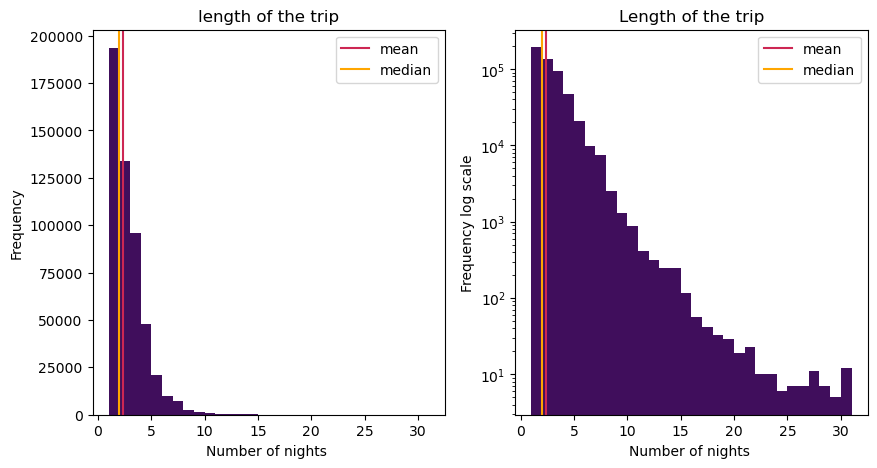

In [71]:
plt.subplots(1,2, figsize= (10,5))
plt.subplot(1,2,1)
plt.hist(data['Nights_Stayed'], bins = 30 ,color ='#400e5c')
plt.axvline(data['Nights_Stayed'].mean(), label='mean', color = '#cd2753')
plt.axvline(data['Nights_Stayed'].median(), label = 'median', color = '#ffa600')
plt.legend()
plt.title('length of the trip')
plt.ylabel('Frequency')
plt.xlabel('Number of nights ')

plt.subplot(1,2,2)
plt.hist(data['Nights_Stayed'], bins = 30 ,color ='#400e5c')
plt.axvline(data['Nights_Stayed'].mean(), label='mean', color = '#cd2753')
plt.axvline(data['Nights_Stayed'].median(), label = 'median', color = '#ffa600')
plt.legend()
plt.yscale('log') #to visualize the values between ~10 and 30 days
plt.title('Length of the trip')
plt.ylabel('Frequency log scale')
plt.xlabel('Number of nights ')
plt.show()

The majority of the reviews include short stays and not week-long holidays. 

In [72]:
data.head(1)

Reviewer_Score                                    Negative_Review  \
0               0   I am so angry that i made this post available...   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   

   Review_Total_Negative_Word_Counts  Review_Total_Positive_Word_Counts  \
0                                397                                 11   

   Leisure_Trip  Nights_Stayed  Days_Since_Review       Date  \
0             1              6                  0 2017-08-03   

   Additional_Number_of_Scoring  Reviewer_Nationality_Australia  \
0                           194                               0   

   Reviewer_Nationality_Ireland  Reviewer_Nationality_UAE  \
0                             0                         0   

   Reviewer_Nationality_UK  Reviewer_Nationality_USA  \
0                        0                         0   

   Reviewer_Nationality_Other  Total_Number_of_Reviews_Reviewer_Has_Given  \
0                           1                                           7   

   Average_Score  Total_Number_of_Reviews  Hotel_Address_Amsterdam  \
0            7.7                     1403                        1   

   Hotel_Address_Barcelona  Hotel_Address_London  Hotel_Address_Milan  \
0                        0                     0                    0   

   Hotel_Address_Paris  Hotel_Address_Vienna   Latitude  Longitude  
0                    0                     0  52.360576   4.915968

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515199 entries, 0 to 515198
Data columns (total 27 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Reviewer_Score                              515199 non-null  int64         
 1   Negative_Review                             515199 non-null  object        
 2   Positive_Review                             515199 non-null  object        
 3   Review_Total_Negative_Word_Counts           515199 non-null  int64         
 4   Review_Total_Positive_Word_Counts           515199 non-null  int64         
 5   Leisure_Trip                                515199 non-null  int64         
 6   Nights_Stayed                               515199 non-null  int64         
 7   Days_Since_Review                           515199 non-null  int64         
 8   Date                                        515199 non-null  datetime64[ns

In [74]:
A = data.loc[data['Hotel_Address_Amsterdam']==1]['Reviewer_Score'].mean()*100
B = data.loc[data['Hotel_Address_Barcelona']==1]['Reviewer_Score'].mean()*100
L = data.loc[data['Hotel_Address_London']==1]['Reviewer_Score'].mean()*100
M = data.loc[data['Hotel_Address_Milan']==1]['Reviewer_Score'].mean()*100
P = data.loc[data['Hotel_Address_Paris']==1]['Reviewer_Score'].mean()*100
V = data.loc[data['Hotel_Address_Vienna']==1]['Reviewer_Score'].mean()*100

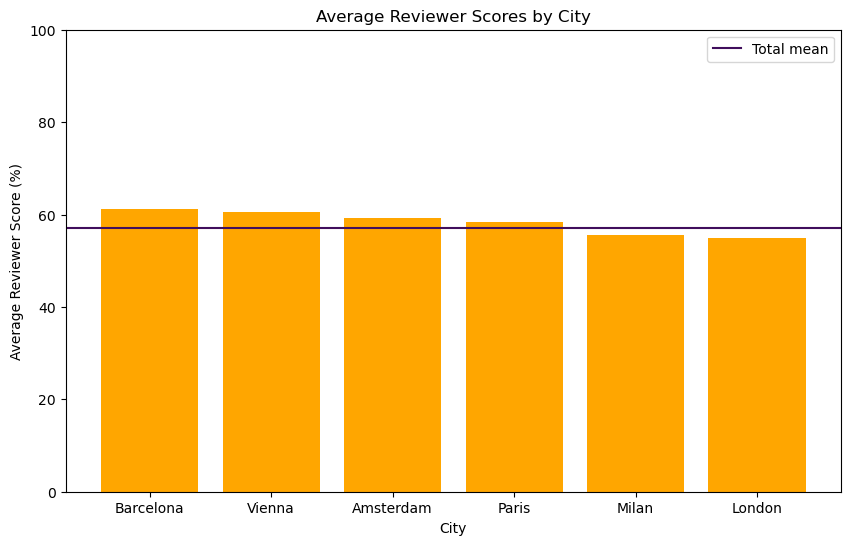

In [75]:
scores = {
    'Barcelona': B,
    'Vienna': V,
    'Amsterdam': A,
    'Paris': P,
    'Milan': M,
    'London': L
}
df_scores = pd.DataFrame(list(scores.items()), columns=['City', 'Average Reviewer Score']) # create a dataframe for visualization

plt.figure(figsize=(10, 6))
plt.bar(df_scores['City'], df_scores['Average Reviewer Score'], color='#ffa600')
plt.xlabel('City')
plt.ylabel('Average Reviewer Score (%)')
plt.title('Average Reviewer Scores by City')
plt.ylim(0, 100)
plt.axhline(y= data['Reviewer_Score'].mean()*100, color='#400e5c', label = 'Total mean')
plt.legend()
plt.show()

Hotel guest satisfaction varies from city to city. Overall, hotel guests in Vienna and Barcelona are more satisfied than those in London and Milan. These cities underperform in terms of customer satisfaction. 

In [76]:
from matplotlib.lines import Line2D
colors = data['Reviewer_Score'].map({0:'#003f5c', 1:'#ffa600'})

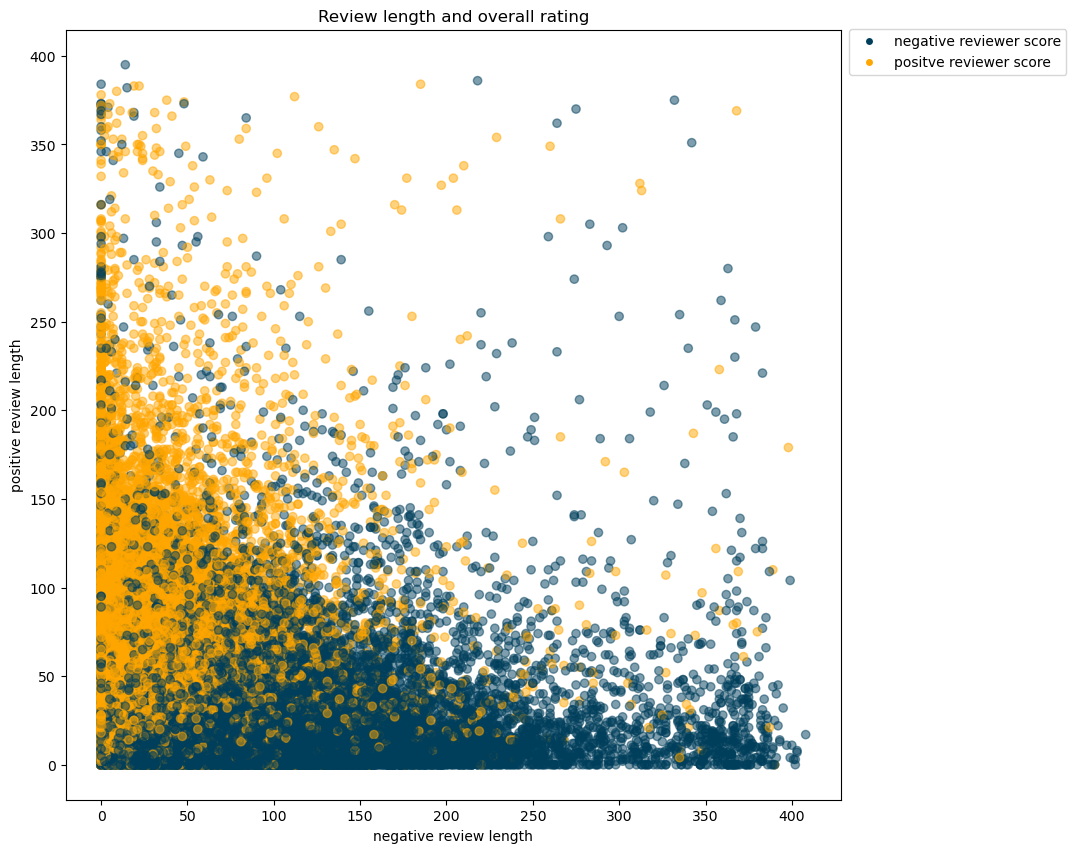

In [77]:
plt.figure(figsize=(10,10))
plt.scatter(x=data['Review_Total_Negative_Word_Counts'],y=data['Review_Total_Positive_Word_Counts'], color = colors, alpha= 0.5)
plt.ylabel('positive review length')
plt.xlabel('negative review length')

custom_lines = [Line2D([0], [0], color='w',markerfacecolor='#003f5c',marker='o', lw=2, label = 'negative reviewer score'),
                Line2D([0], [0], color='w',markerfacecolor='#ffa600',marker='o', lw=2,label = 'positve reviewer score')]

plt.title('Review length and overall rating')
plt.legend(handles= custom_lines, loc ='upper right', bbox_to_anchor=(1.30, 1.01))
plt.show()

Sources:          
https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas.Series.map            
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html           
https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html#sphx-glr-gallery-text-labels-and-annotations-custom-legends-py           

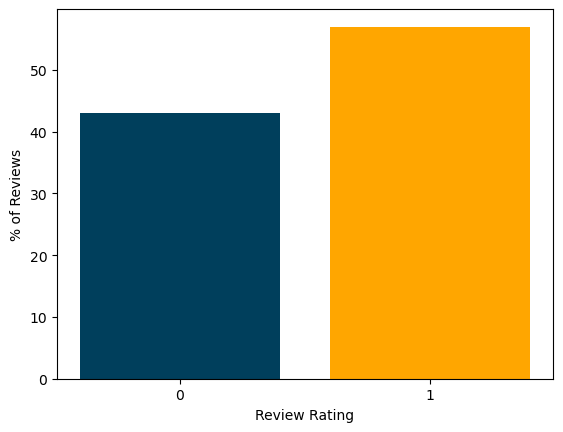

Class imbalance: [0.43 0.57]


In [78]:
values, counts = np.unique(data['Reviewer_Score'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(["0", "1"], normalized_counts*100, color = ['#003f5c','#ffa600'])
plt.xlabel('Review Rating')
plt.ylabel('% of Reviews')
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

We see a correlation between the length of the positive and negative statements and the reviewer's overall rating. If both texts, i.e. the positive and the negative text, are approximately the same length, there seems to be a tendency to mark the overall experience as positive (yellow). The respective extreme ranges are interesting. For example, there are reviewers who write long positive texts and short negative texts and still give a negative overall rating. The total length of a review therefore does not have an absolute influence on the result. The correlation is examined below

### 4.2 Preprocessing


First, create a dataframe which only contains the columns of 'intrest' - e.g. the review texts and the reviewer score.

In [79]:
reviews = data.loc[:,['Reviewer_Score','Negative_Review','Positive_Review']]

In [80]:
from sklearn.model_selection import train_test_split

Split our dataframe reviews into a test and a train set

In [81]:
y = reviews['Reviewer_Score']
X = reviews[['Negative_Review','Positive_Review']]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49, stratify=y)


Now we split X_train and X_test in X_train_neg/ X_train_pos and X_test_neg/X_test_pos for performance reasons. Let's have a look to get an better understanding. 

In [83]:
X_train.head()

Negative_Review  \
394529   Had stayed in 60 hotels around the world and ...   
287411                                        No Negative   
51338    Forced to have another room as i have kids Ge...   
194338                      Mattress was not comfortable    
175001   It would have been nice to have had some refr...   

                                          Positive_Review  
394529                                           Nothing   
287411                    The staffs are kind and helpful  
51338                                            Location  
194338                                        No Positive  
175001   I was enchanted by the lovely homely feel at ...

X_train and X_test contain 2 columns - one for the negative and one for the positive Review text. Due to the large number of entries and in order to maintain an overview, the positive and negative reviews are saved in separate data frames. We split them. 

In [84]:
X_train_neg = X_train['Negative_Review']
X_train_pos = X_train['Positive_Review']
X_test_neg = X_test['Negative_Review']
X_test_pos = X_test['Positive_Review']

In [85]:
print(f'X_train_neg: {X_train_neg.shape}, X_train_pos: {X_train_pos.shape} and y_train:{y_train.shape}')
print(f'X_test_neg: {X_test_neg.shape}, X_test_pos: {X_test_pos.shape} and y_test: {y_test.shape}')

X_train_neg: (412159,), X_train_pos: (412159,) and y_train:(412159,)
X_test_neg: (103040,), X_test_pos: (103040,) and y_test: (103040,)


No we transform our data with a Tokenizer

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

In [87]:
# 1. Instantiate the tokenizer
vectorizer_pos_raw = CountVectorizer() 

# 2. fit
vectorizer_pos_raw.fit(X_train_pos)

# 3. Transform
X_train_pos_transformed = vectorizer_pos_raw.transform(X_train_pos)


In [88]:
# 1. Instantiate the tokenizer
vectorizer_neg_raw = CountVectorizer() 

# 2. fit
vectorizer_neg_raw.fit(X_train_neg)

# 3. Transform
X_train_neg_transformed = vectorizer_neg_raw.transform(X_train_neg)

Wichtiger Hinweis. Normalerweise müssten die Testdaten hier auch mit dem entsprechenden Vectorizer transformiert werden, da ich diesen allerdings noch anpassen werde, wir dies erst mit dem finalen Vectorizer_pos/_neg gemacht

We have created a sparse matrix with each of these two code blocks. Each comment was split into its words and these were created as columns in the matrix. Each word only appears once in the columns. If this word now appears in the comment, a number corresponding to the number of words in the comment is created in the corresponding row. The resulting matrices are very large (see below), so it makes sense to divide them into positive comments and negative comments.

In [89]:
X_train_pos_transformed

<412159x45691 sparse matrix of type '<class 'numpy.int64'>'
	with 5612148 stored elements in Compressed Sparse Row format>

In [90]:
X_train_neg_transformed

<412159x49622 sparse matrix of type '<class 'numpy.int64'>'
	with 5711024 stored elements in Compressed Sparse Row format>

Jetzt schauen wir uns an, welche Token der Vectorizer_pos/neg_raw erzeugt hat. 

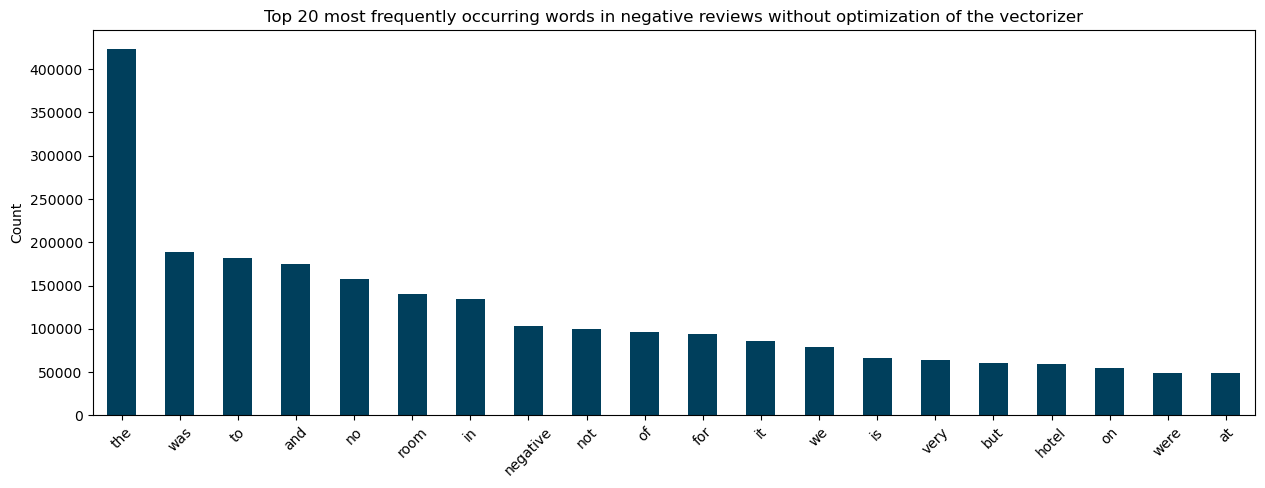

In [91]:
word_counts = pd.DataFrame(
    {"counts": X_train_neg_transformed.sum(axis=0).A1}, #alternative: .A.flatten() instead of .A1
    index=vectorizer_neg_raw.get_feature_names()
).sort_values("counts", ascending=False)

# Plotting the top 20 most frequently occurring words
word_counts.head(20).plot(kind="bar", figsize=(15, 5),color='#003f5c',  legend=False)
plt.title("Top 20 most frequently occurring words in negative reviews without optimization of the vectorizer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

  The first approach with .toarray() wasn't working because of memory issues. I had to look up an alternative.  Using the .A1 to flatten the matrix inplace instead of creating an array. Somehow CountVectorizer' object has no attribute 'get_feature_names_out' - I use the get_feature_names instead. 


Sources:
https://stackoverflow.com/questions/73415826/          how-to-covert-a-large-106-106-numpy-sparse-matrix-to-a-scipy-sparse-matrix
https://numpy.org/doc/stable/reference/generated/numpy.matrix.html


We will now reduce the total number of tokens. We can see above that many words in the top 20 of the train_neg data example have no meaning. It can also be assumed that many words in the 412159x49514 matrix have no meaning and only cost memory space. Therefore, the CountVectoriser() method is extended by parameters and a function:

#### Finetuning of the transformer CountVectorizer

In [92]:
import joblib

In [93]:
# #1. Instantiate the tokenizer for our positive reviews
# vectorizer_pos = CountVectorizer(stop_words='english',
# 								tokenizer = custom_tokenizer, 
# 								min_df =10, # the minimum occurance of a word in 5 reviews 
# 								max_features =500, #we limit the number of tokens to 1500
# 								ngram_range=(1, 3)) # to explode the features we include word combinations in this case: 2 words. for example: very good instead of very and good.

# # 2. fit
# vectorizer_pos.fit(X_train_pos)


In [94]:
# #1. Instantiate the tokenizer for the negative reviews
# vectorizer_neg = CountVectorizer(stop_words='english',
# 								tokenizer = custom_tokenizer, 
# 								min_df =10, 
# 								max_features =500, 
# 								ngram_range=(1, 3)) # good in combination with min_df to get rid of useless pairs

# # 2. fit
# vectorizer_neg.fit(X_train_neg)


Because of the long runtime, I only run this code once. Then I saved my customized model in ./models

In [95]:
# joblib.dump(vectorizer_pos, './models/vectorizer_pos.pkl')

In [96]:
# joblib.dump(vectorizer_neg, './models/vectorizer_neg.pkl')

#### Reload the fitted vectorizer 

In [97]:
vectorizer_pos = joblib.load('./models/vectorizer_pos.pkl')
vectorizer_neg = joblib.load('./models/vectorizer_neg.pkl')


#### Transformation of our X_tests (neg/pos) and X_train(neg/pos) with our CountVectorizers

Wir müssen den Transformizer, den wir mit Hilfe von X_train jeweils erstellt haben noch auf X_train und X_test jeweils für positive und negative Werte anwenden.

We transform the X_test_neg/X_test_pos. But we use the fitted transformer from our training data. Therefore, any word that is in our test set and not in our train set will be ignored because the sparse matrix has no corresponding column

In [98]:
# # 3. Transform
# X_train_pos_transformed = vectorizer_pos.transform(X_train_pos)
# X_test_pos_transformed = vectorizer_pos.transform(X_test_pos)

# X_train_neg_transformed = vectorizer_neg.transform(X_train_neg)
# X_test_neg_transformed = vectorizer_neg.transform(X_test_neg)

We safe this matrices...

In [99]:
# sp.sparse.save_npz('./models/X_train_pos_transformed.npz',X_train_pos_transformed)
# sp.sparse.save_npz('./models/X_train_neg_transformed.npz',X_train_neg_transformed)
# sp.sparse.save_npz('./models/X_test_neg_transformed.npz',X_test_neg_transformed)
# sp.sparse.save_npz('./models/X_test_pos_transformed.npz',X_test_pos_transformed)

#### Reloading of our safed and transformed sparse matrices

In [100]:
X_train_pos_transformed = sp.sparse.load_npz('./models/X_train_pos_transformed.npz')
X_train_neg_transformed = sp.sparse.load_npz('./models/X_train_neg_transformed.npz')
X_test_neg_transformed = sp.sparse.load_npz('./models/X_test_neg_transformed.npz')
X_test_pos_transformed = sp.sparse.load_npz('./models/X_test_pos_transformed.npz')

In [101]:
print(X_train_pos_transformed.shape)
print(X_train_neg_transformed.shape)
print(X_test_neg_transformed.shape)
print(X_test_pos_transformed.shape)

(412159, 500)
(412159, 500)
(103040, 500)
(103040, 500)


#### Visualization of the sparce matrices

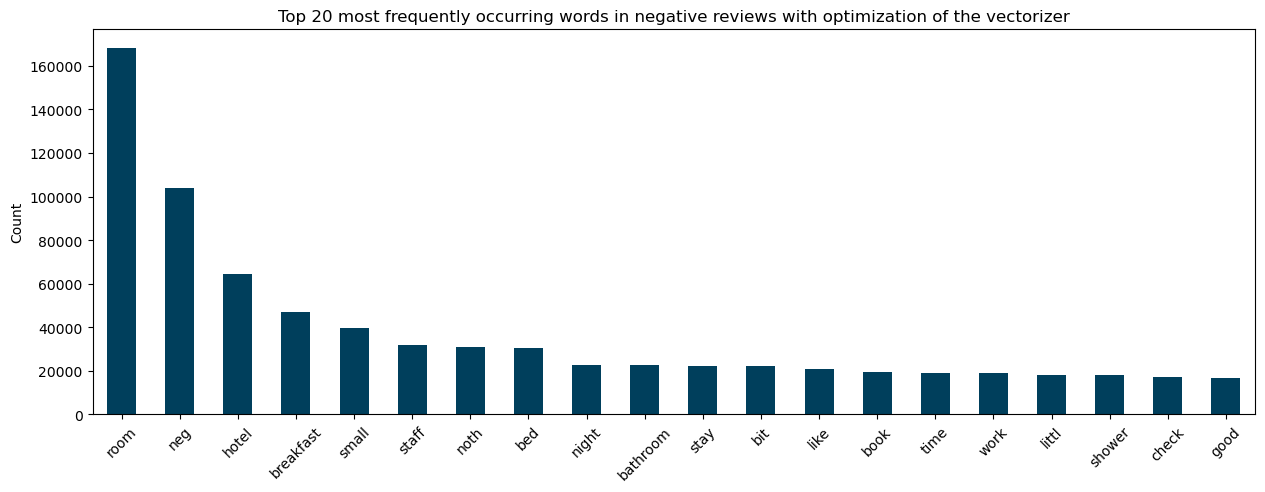

In [102]:
word_counts_neg = pd.DataFrame(
    {"counts": X_train_neg_transformed.sum(axis=0).A1}, #alternative: .A.flatten() instead of .A1
    index=vectorizer_neg.get_feature_names()
).sort_values("counts", ascending=False)

# Plotting the top 20 most frequently occurring words
word_counts_neg.head(20).plot(kind="bar", figsize=(15, 5),color='#003f5c',  legend=False)
plt.title("Top 20 most frequently occurring words in negative reviews with optimization of the vectorizer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

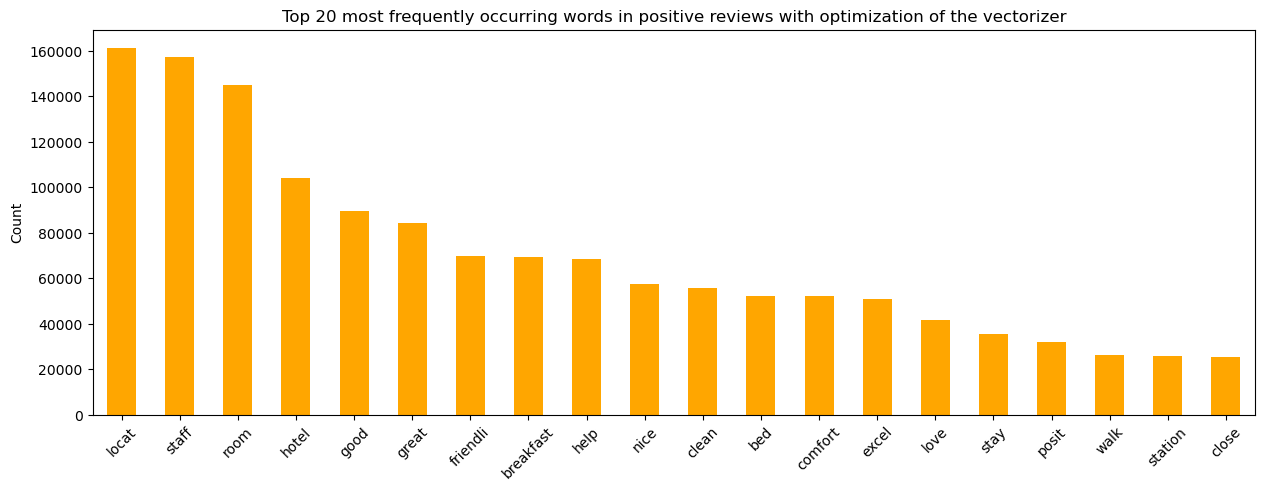

In [103]:
word_counts_pos = pd.DataFrame(
    {"counts": X_train_pos_transformed.sum(axis=0).A1}, #alternative: .A.flatten() instead of .A1
    index=vectorizer_pos.get_feature_names()
).sort_values("counts", ascending=False)

# Plotting the top 20 most frequently occurring words
word_counts_pos.head(20).plot(kind="bar", figsize=(15, 5),color='#ffa600',  legend=False)
plt.title("Top 20 most frequently occurring words in positive reviews with optimization of the vectorizer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Wir sehen nun, dass wir eine präzisere Auswahl an Wörtern haben und wir deshalb eine in der Qualität angereicherte sparse Matrix haben. 

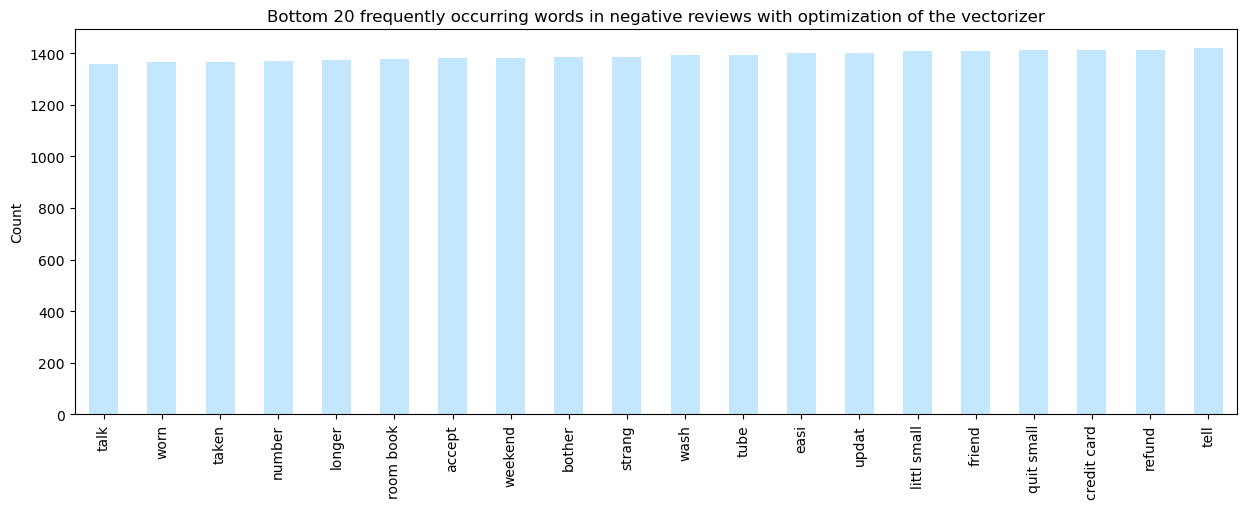

In [104]:
word_counts_neg.sort_values('counts', ascending =True).head(20).plot(kind="bar", figsize=(15, 5),color='#c2e7ff',  legend=False)
plt.title("Bottom 20 frequently occurring words in negative reviews with optimization of the vectorizer")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

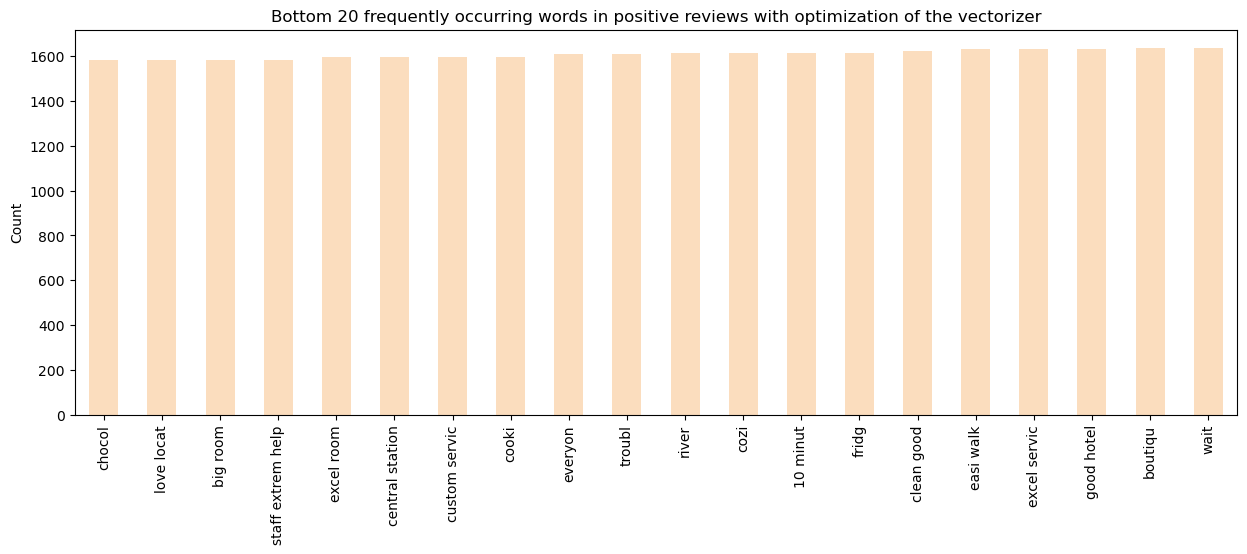

In [105]:
word_counts_pos.sort_values('counts', ascending =True).head(20).plot(kind="bar", figsize=(15, 5),color='#fbddbe',  legend=False)
plt.title("Bottom 20 frequently occurring words in positive reviews with optimization of the vectorizer")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


#### Prepartation of the concating of the matrices 

In [106]:
token_neg = vectorizer_neg.get_feature_names()
new_vocab_neg = ["neg_" + token for token in token_neg]
vocab_mapping_neg = {old: new for old, new in zip(token_neg, new_vocab_neg)}

# renamed matrix
X_train_neg_transformed = rename_tokens(X_train_neg_transformed, vocab_mapping_neg, token_neg)

In [107]:
token_pos = vectorizer_pos.get_feature_names()
new_vocab_pos = ["pos_" + token for token in token_pos]

vocab_mapping_pos = {old: new for old, new in zip(token_pos, new_vocab_pos)}

#renamed matrix
X_train_pos_transformed = rename_tokens(X_train_pos_transformed, vocab_mapping_pos, token_pos)

Sanity check:

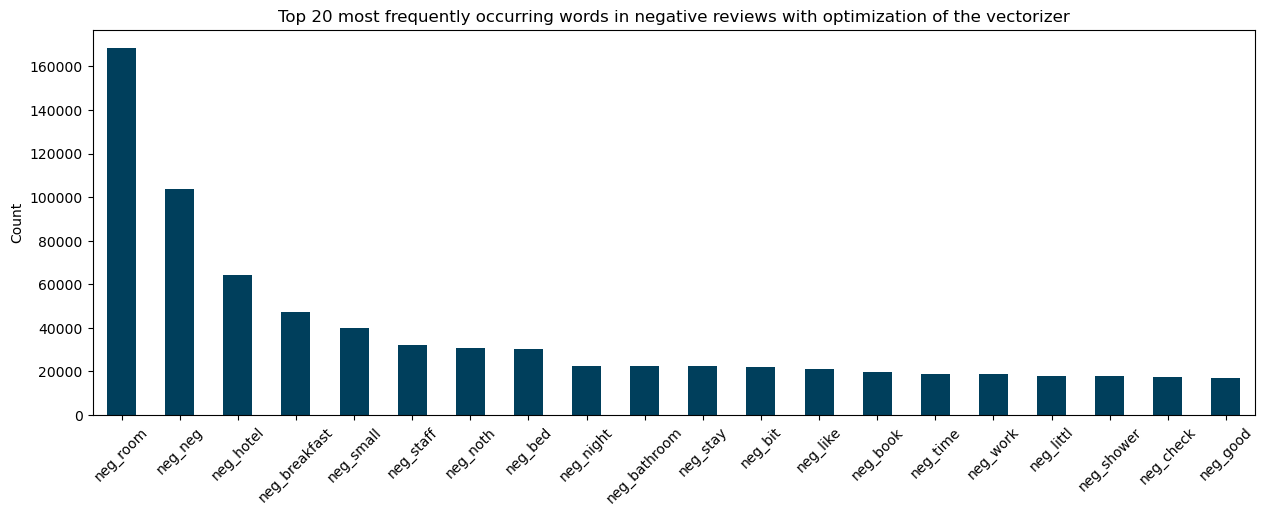

In [108]:
word_counts_neg = pd.DataFrame(
    {"counts": X_train_neg_transformed.sum(axis=0).A1}, #alternative: .A.flatten() instead of .A1
    index=new_vocab_neg
).sort_values("counts", ascending=False)

# Plotting the top 20 most frequently occurring words
word_counts_neg.head(20).plot(kind="bar", figsize=(15, 5),color='#003f5c',  legend=False)
plt.title("Top 20 most frequently occurring words in negative reviews with optimization of the vectorizer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [109]:
X_train_neg

394529     Had stayed in 60 hotels around the world and ...
287411                                          No Negative
51338      Forced to have another room as i have kids Ge...
194338                        Mattress was not comfortable 
175001     It would have been nice to have had some refr...
                                ...                        
106325                    No flexibility in check out time 
328818                         No airport transfers at all 
176846                                          No Negative
134362                                          No Negative
24164                                              Nothing 
Name: Negative_Review, Length: 412159, dtype: object

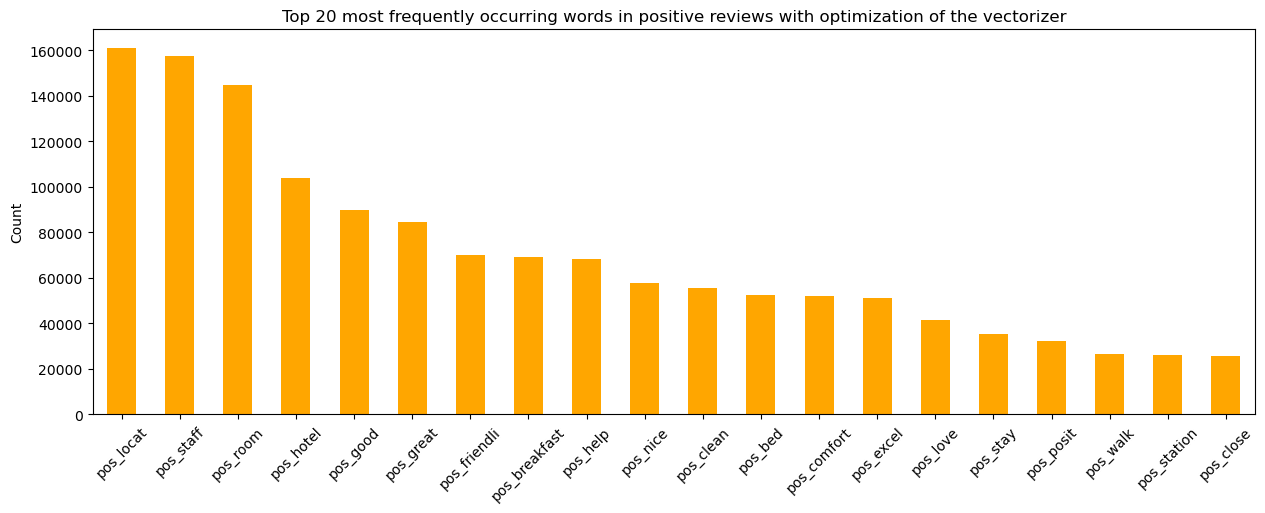

In [110]:
word_counts_pos = pd.DataFrame(
    {"counts": X_train_pos_transformed.sum(axis=0).A1}, #alternative: .A.flatten() instead of .A1
    index=new_vocab_pos
).sort_values("counts", ascending=False)


# Plotting the top 20 most frequently occurring words
word_counts_pos.head(20).plot(kind="bar", figsize=(15, 5),color='#ffa600',  legend=False)
plt.title("Top 20 most frequently occurring words in positive reviews with optimization of the vectorizer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



#### Concating train and test

In [111]:
X_train_neg_df = pd.DataFrame(X_train_neg_transformed.toarray(), columns=new_vocab_neg, index=X_train_neg.index)
X_train_pos_df = pd.DataFrame(X_train_pos_transformed.toarray(), columns=new_vocab_pos, index= X_train_pos.index)
X_train_df = pd.concat([X_train_pos_df, X_train_neg_df], axis= 1  )

In [147]:
X_train_neg_df['neg_perfect']

394529    0
287411    0
51338     0
194338    0
175001    0
         ..
106325    0
328818    0
176846    0
134362    0
24164     0
Name: neg_perfect, Length: 412159, dtype: int64

In [113]:
X_train_df.shape

(412159, 1000)

In [114]:
X_test_neg_df = pd.DataFrame(X_test_neg_transformed.toarray(), columns=new_vocab_neg, index=X_test_neg.index)
X_test_pos_df = pd.DataFrame(X_test_pos_transformed.toarray(), columns=new_vocab_pos, index= X_test_pos.index)
X_test_df = pd.concat([X_test_pos_df, X_test_neg_df], axis= 1  )

In [115]:
X_train_df.columns

Index(['pos_1', 'pos_10', 'pos_10 minut', 'pos_15', 'pos_2', 'pos_20', 'pos_3',
       'pos_4', 'pos_5', 'pos_5 minut',
       ...
       'neg_wi fi', 'neg_wifi', 'neg_window', 'neg_window open', 'neg_work',
       'neg_worn', 'neg_worst', 'neg_worth', 'neg_wrong', 'neg_year'],
      dtype='object', length=1000)

In [116]:
index_X_train = X_train_df.index

Sanity-Check

Ich erwarte in dieser Schleife keine Ausgabe, weil der Index aus Train nicht in Test ist.

In [117]:
index_X_train = X_train_df.index
for i in index_X_train:
    if  i not in X_test_df.index:
        continue
    else:
        print(i)

### 4.3 Logistic regression model

Hyperparametertuning: 

In [118]:
c_value = np.array([0.001, 0.01, 0.1, 1, 10, 100,1000, 10000, 100_000])

In [119]:
# validation_scores = []
# train_scores = []

# for val in c_value:
#     logreg_model = LogisticRegression(C=val, max_iter= 1000, random_state= 123)
#     logreg_model.fit(X_train_df, y_train)

#     train_scores.append(logreg_model.score(X_train_df,y_train))
#     validation_scores.append(logreg_model.score(X_test_df,y_test))

We safe the validation lists after calculating the values

In [120]:
# joblib.dump(validation_scores, './models/validation_scores.pkl') 
# joblib.dump(train_scores, './models/train_scores.pkl')

Reload the validation lists:

In [121]:
validation_scores = joblib.load('./models/validation_scores.pkl')
train_scores = joblib.load('./models/train_scores.pkl')

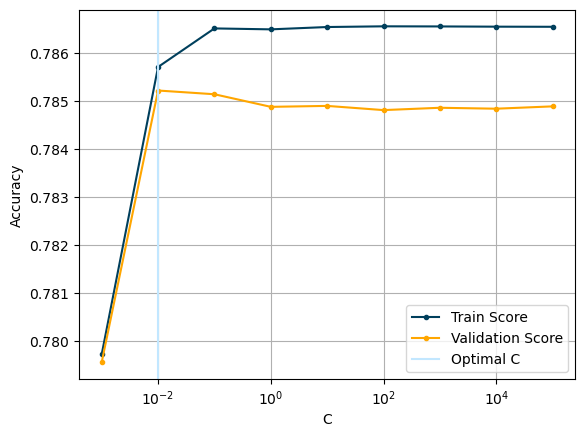

In [122]:
#plotting results
plt.figure()
plt.plot(c_value,train_scores, label='Train Score',marker='.', color='#003f5c')
plt.plot(c_value,validation_scores, label='Validation Score',marker='.',color='#ffa600')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale("log")
plt.axvline(0.01, label = 'Optimal C', color = '#c2e7ff')
plt.grid()
plt.legend()
plt.show()

The choosen C is C= 0.1

In [123]:
logistic_Regression_model = LogisticRegression(C=0.1, max_iter=1000, random_state=123)

logistic_Regression_model.fit(X_train_df, y_train)



Train Accuracy: 79.0%
Test Accuracy: 79.0%


In [125]:
y_pred = logistic_Regression_model.predict(X_test_df)

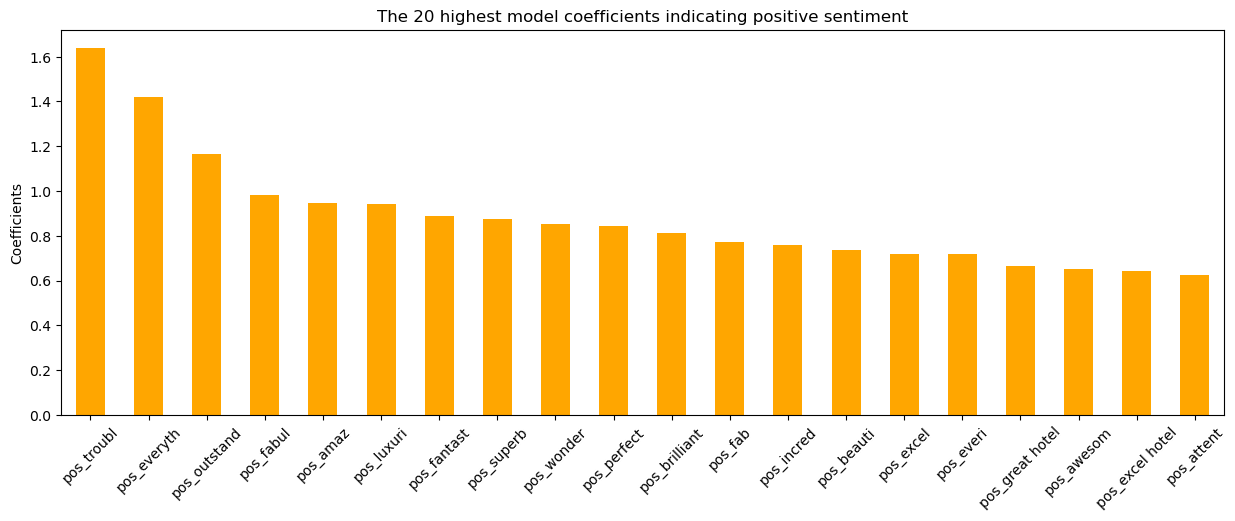

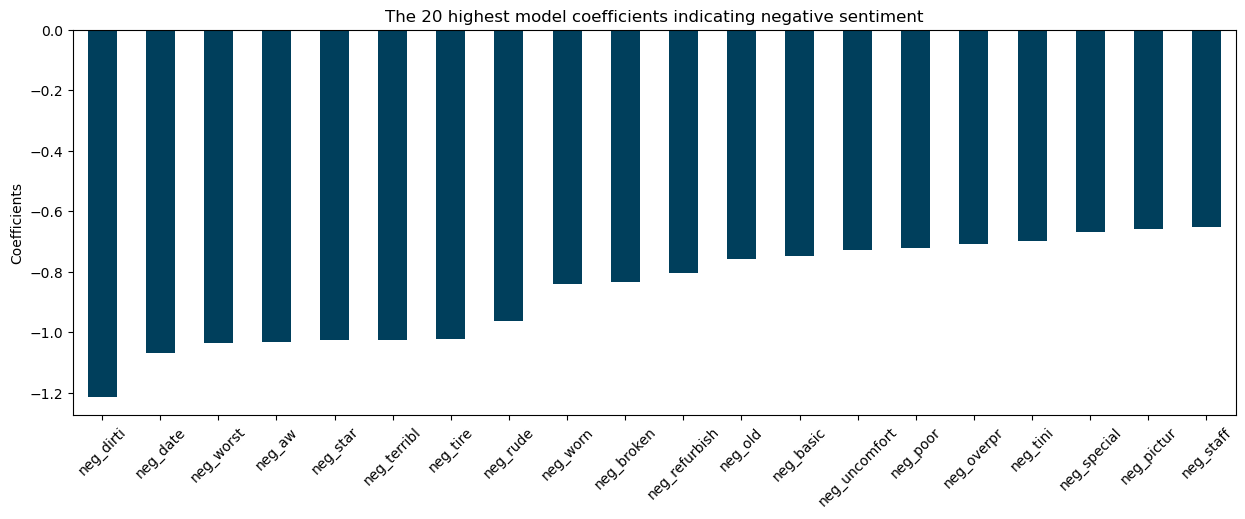

In [161]:
#TODO: add odds ratio column
word_counts = pd.DataFrame(
    {
        "coefficients": logistic_Regression_model.coef_[0]},
        index=X_train_df.columns
)


# filtering of the positive or negative tokens 
positive_word_counts = word_counts[word_counts.index.str.startswith('pos_')]
negative_word_counts = word_counts[word_counts.index.str.startswith('neg_')]



positive_word_counts = positive_word_counts.sort_values("coefficients", ascending=False)
negative_word_counts = negative_word_counts.sort_values("coefficients", ascending= True)





positive_word_counts.head(20).plot(kind="bar", figsize=(15, 5),color='#ffa600', legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

negative_word_counts.head(20).plot(kind="bar", figsize=(15, 5),color='#003f5c', legend=False)
plt.title("The 20 highest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

 pos_troubl - beiden sind meiner Analyse nach zuerecht im entsprechenden Datensatz. 
filtered_tokens = [token for token in token_neg if 'perfect' in token] - ja, ist in token_neg


 Fragen, wie ich sichergehen kann, dass der Index noch funktionert - gerade in bezug auf pos_troubl.

In [162]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0       0.76      0.73      0.74     44297
           1       0.80      0.83      0.81     58743

    accuracy                           0.79    103040
   macro avg       0.78      0.78      0.78    103040
weighted avg       0.78      0.79      0.78    103040



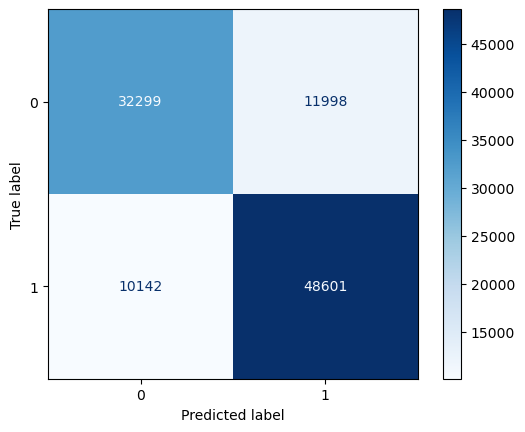

In [164]:
report_Logistic_model = classification_report(y_test,y_pred)
print(report_Logistic_model)


cf_matrix_train = confusion_matrix(y_test, y_pred)


ConfusionMatrixDisplay(cf_matrix_train).plot(cmap="Blues", values_format='')

Sources to get rid of the scientific notation: https://stackoverflow.com/questions/65463392/sklearn-metrics-confusionmatrixdisplay-using-scientific-notation

In [124]:
# 3. Score on training data
print(f'Train Accuracy: {np.round(logistic_Regression_model.score(X_train_df,y_train),4)*100}%')

# 4. Score on testing data
print(f'Test Accuracy: {np.round(logistic_Regression_model.score(X_test_df,y_test), 4)*100}%')

Train Accuracy: 78.64999999999999%
Test Accuracy: 78.51%


In [166]:
y_proba = logistic_Regression_model.predict_proba(X_test_df)[:,1]

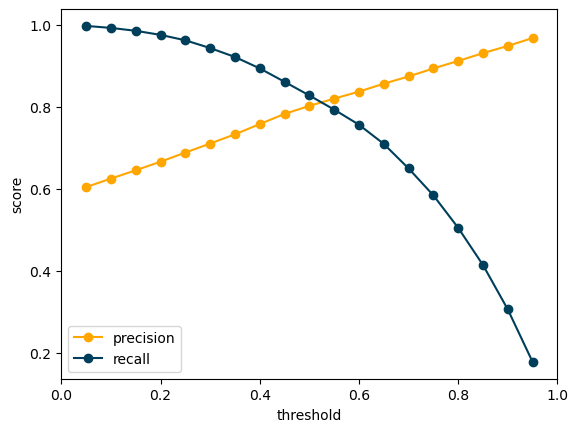

In [173]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

thresholds = np.arange(0.05, 1, 0.05)
precisions = list()
recalls = list()

for threshold in thresholds:

    # Apply threshold
    y_threshold = np.where(y_proba > threshold, 1, 0)

    # Calculate precision and recall
    precision = precision_score(y_test, y_threshold)
    recall = recall_score(y_test, y_threshold)

    # Append to list
    precisions.append(precision)
    recalls.append(recall)


plt.figure()
plt.plot(thresholds, precisions, color = '#ffa600',label='precision', marker='o')
plt.plot(thresholds, recalls,color= '#003f5c', label='recall', marker='o')
plt.xlim(0, 1)
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.show()




In [175]:



# Iterate over the thresholds and compute the positive and negative recall
true_positive_rates = []
false_positive_rates = []

thresholds = np.linspace(0, 1, 50)
for threshold in thresholds:

    # Apply the cutoff and calculate the positive and negative recall
    y_pred = np.where(y_proba > threshold, 1, 0)

    tpr = recall_score(y_test, y_pred)
    fpr = false_positive_rate(y_test, y_pred)

    true_positive_rates.append(tpr)
    false_positive_rates.append(fpr)

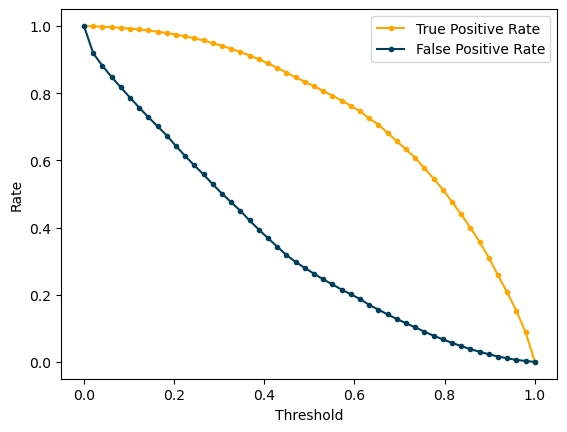

In [176]:
plt.figure()
plt.plot(thresholds, true_positive_rates, label='True Positive Rate', marker='.',color = '#ffa600') 

plt.plot(thresholds, false_positive_rates, label='False Positive Rate', marker='.',color= '#003f5c') 
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.legend()
plt.show()

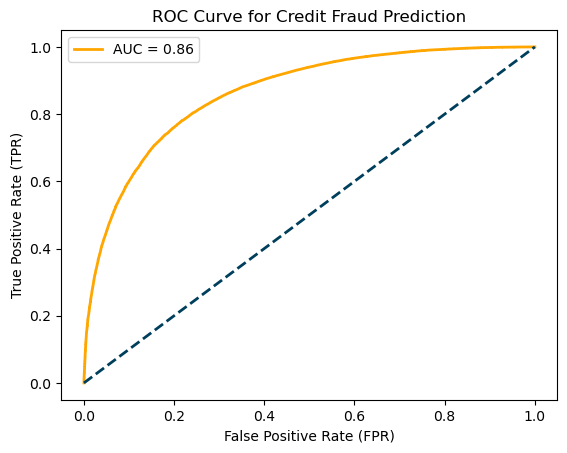

Area under curve (AUC):0.8630414714358626



In [182]:
from sklearn.metrics import roc_curve, roc_auc_score

fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fprs, tprs,color = '#ffa600',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color= '#003f5c', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Credit Fraud Prediction')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC):{roc_auc}')
print()


In [183]:
import plotly.graph_objs as go
import plotly.express as px



fig = go.Figure()

#ROC curve
fig.add_trace(go.Scatter3d(x=fprs, y=tprs, z=thresholds, mode='lines+markers', marker=dict(size=2), line=dict(color = '#ffa600')))


fig.add_trace(go.Scatter3d(x=[0, 1], y=[0, 1], z=[0, 0], mode='lines', line=dict(color= '#003f5c', dash='dash')))


fig.update_layout(
    scene=dict(
        xaxis_title='False Positive Rate (FPR)',
        yaxis_title='True Positive Rate (TPR)',
        zaxis_title='reversed_threshold',
    ),
    title="3D Receiver Operating Characteristic (ROC)",
    width=1500,  
    height=500
)


fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

### 4.4 PCA with a decision tree classifier

### 4.5 In-depth evaluation